In [1]:
import numpy as np
from sklearn.svm import SVR, SVC
from utils import read_neutouch_raw, infer, bin_neutouch_signal
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os.path

In [2]:
# goal: compare new samples with old samples

left_taxel_map = np.load('left_map_rectangular.npy')
right_taxel_map = np.load('right_map_rectangular.npy')

def plot(fname, some_list):
    
    l = left_taxel_map.copy()
    r = right_taxel_map.copy()
    
    for taxel in some_list:
        if taxel <= 40:
            l[l == taxel] = some_list[taxel]
        else:
            r[r == taxel] = some_list[taxel]
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,10))
    fig.patch.set_facecolor('white')
    ax[0].imshow(l)
    ax[0].axis('off')
    ax[1].imshow(r)
    ax[1].axis('off')
    
    plt.tight_layout(True)
    plt.savefig(fname+'.png')

In [3]:
tool_length = 50
trial = 10

time_past = 0.05
time_future = 0.25

df_raw = read_neutouch_raw(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}.tact')
# df_raw = df_raw.iloc[10000:250000]
df_essentials = pd.read_csv(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}_essentials.csv')
#df_essentials = df_essentials.iloc[:9]

In [4]:
tapped_times = df_essentials.t.values
len(tapped_times)

100

In [5]:
def init_list():
    my_list = {}
    for i in range(80):
        my_list[i+1] = 0
    return my_list

def add_list(l1, l2):
    for i in range(80):
        l1[i+1] += l2[i+1]
    return l1

/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.

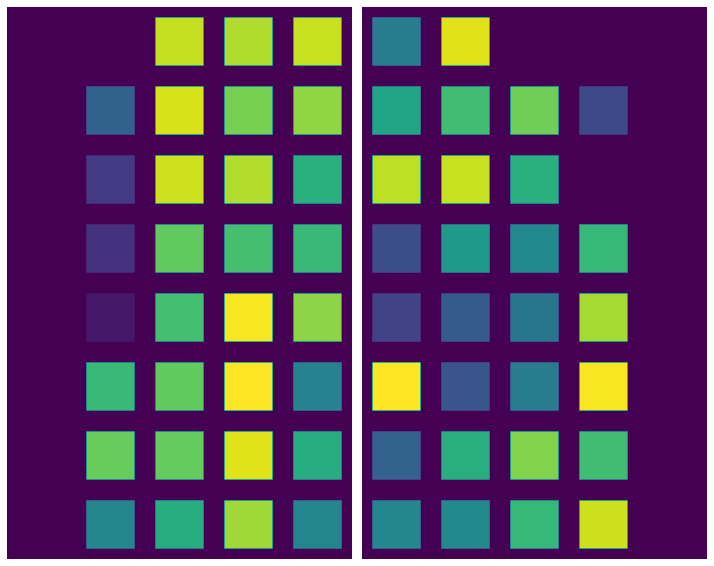

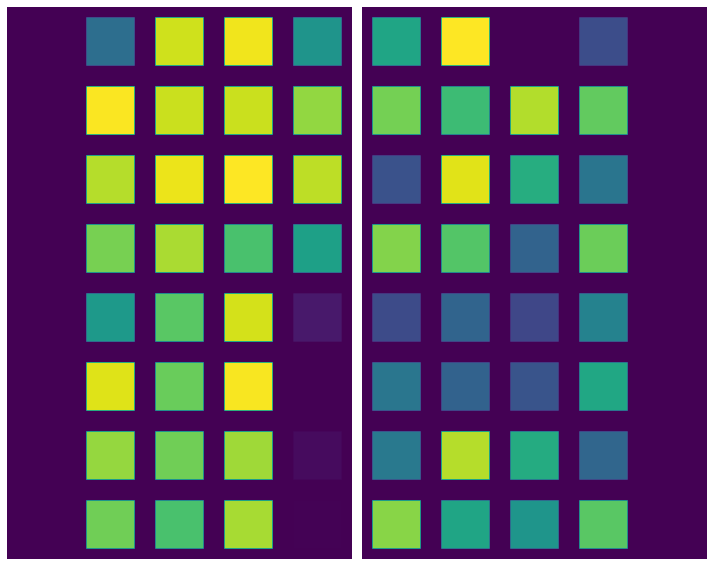

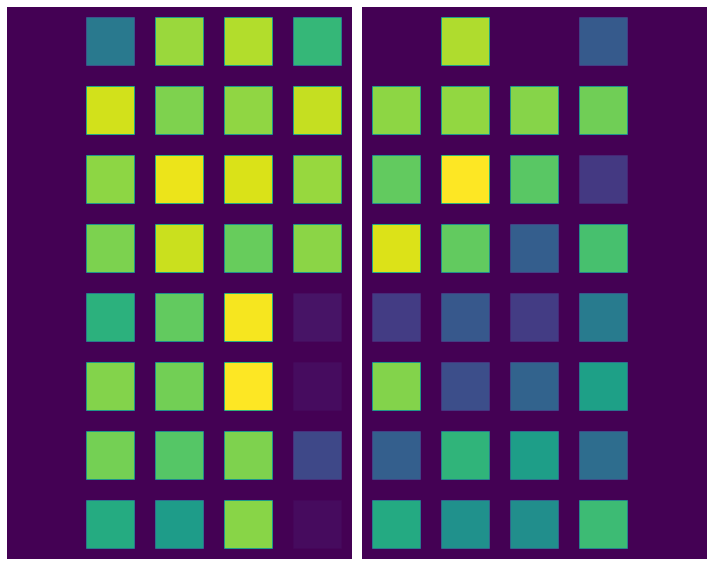

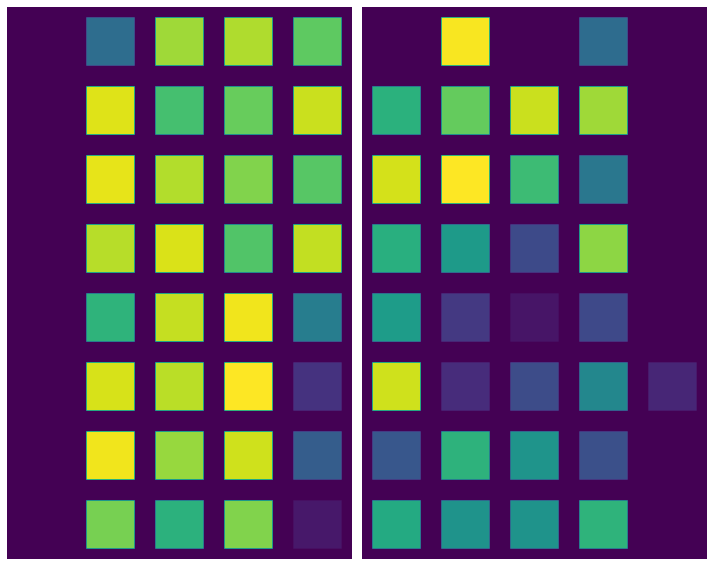

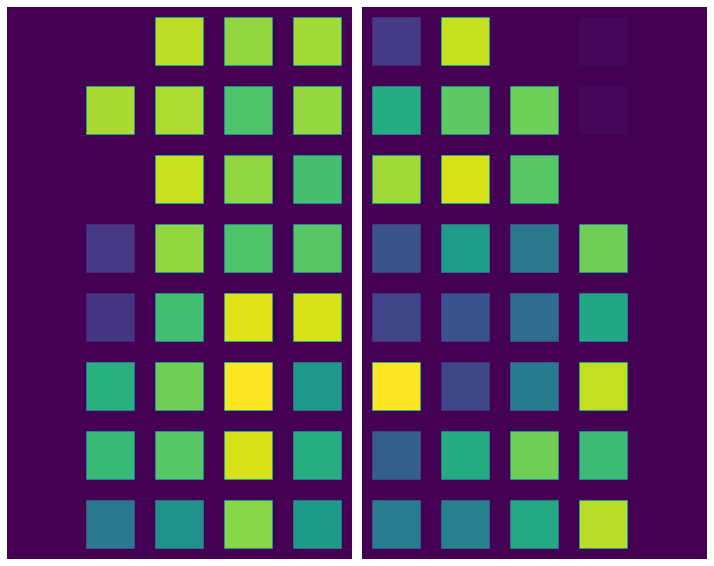

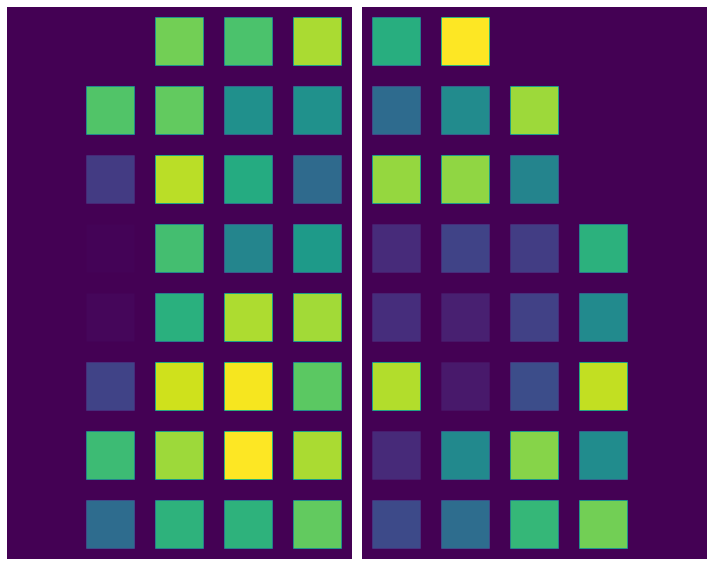

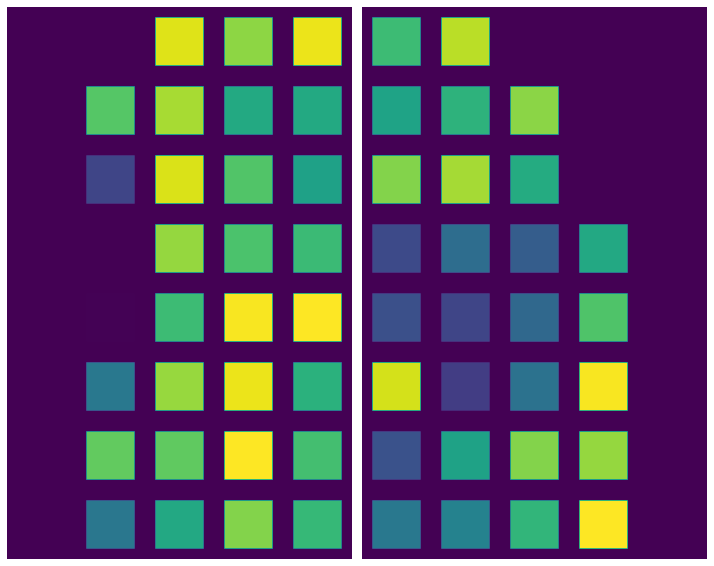

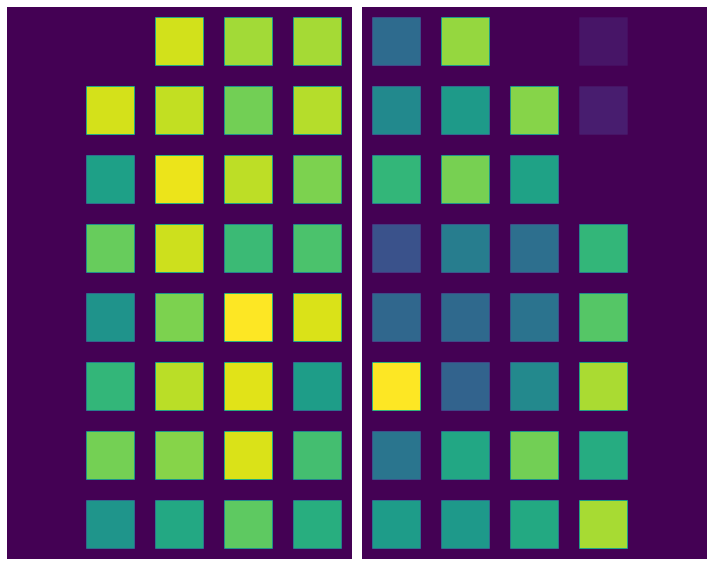

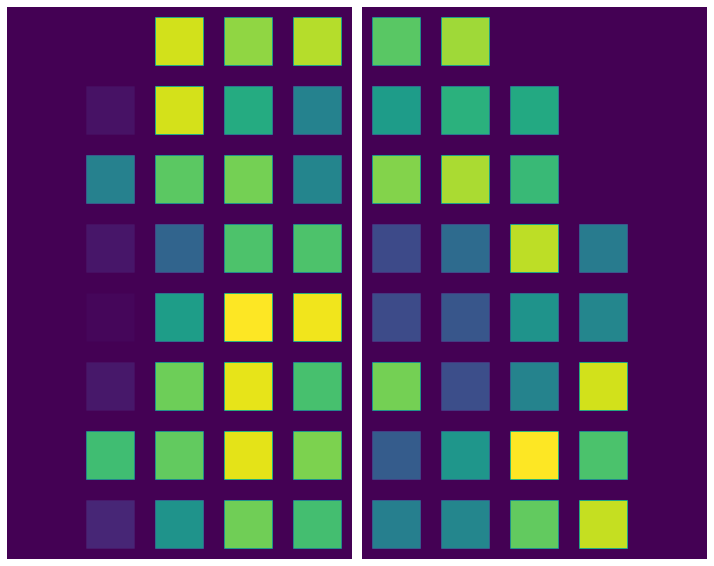

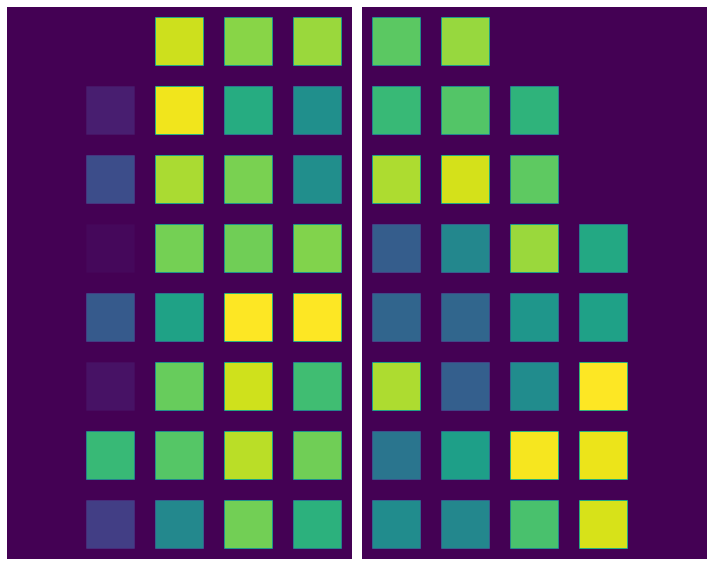

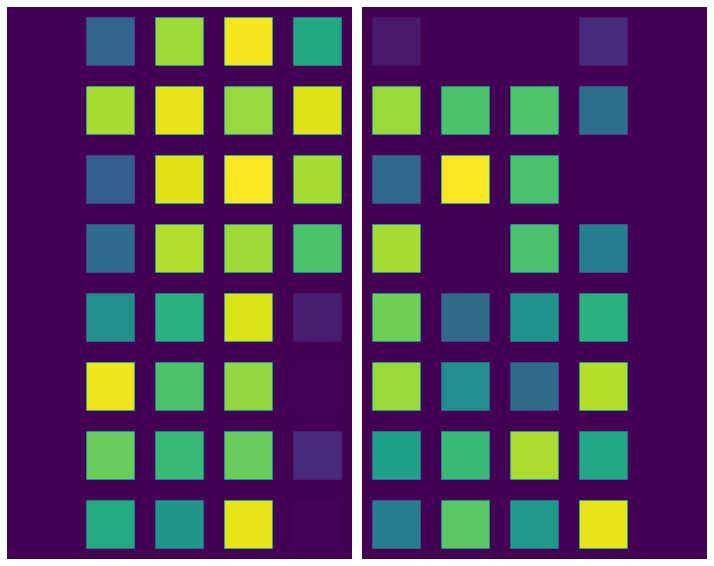

In [6]:
save_dir = 'analysis_rod'
total_list = init_list()
for trial in range(1, 14):
    
    fname = f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}.tact'
    if os.path.isfile(fname):
        df_raw = read_neutouch_raw(fname)
        df_essentials = pd.read_csv(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}_essentials.csv')
        tapped_times = df_essentials.t.values
        trial_list = init_list()
        for tap_time in tapped_times:
            df_timespan = df_raw[(df_raw.t >= (tap_time - time_past)) & (df_raw.t < (tap_time + time_future))]
            for index, value in df_timespan.taxel.value_counts().iteritems():
                if index == 0:
                    continue
                trial_list[index] += value
        plot(f'{save_dir}/rod_{tool_length}_{trial}', trial_list)
        total_list = add_list(total_list, trial_list)

/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


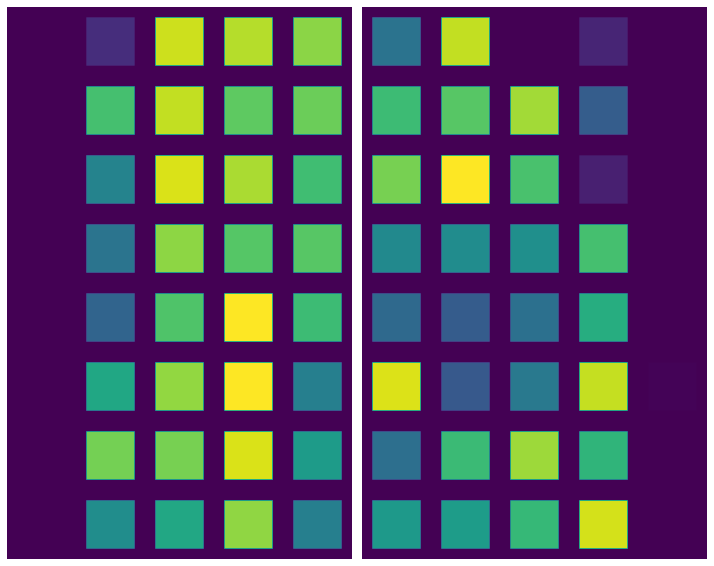

In [7]:
plot(f'{save_dir}/rod_{tool_length}_all', total_list)

In [9]:
#!zip -r analysis_rod.zip analysis_rod/

  adding: analysis_rod/ (stored 0%)
  adding: analysis_rod/rod_30_8.png (deflated 48%)
  adding: analysis_rod/rod_50_2.png (deflated 46%)
  adding: analysis_rod/rod_50_7.png (deflated 46%)
  adding: analysis_rod/rod_30_4.png (deflated 49%)
  adding: analysis_rod/rod_20_2.png (deflated 49%)
  adding: analysis_rod/rod_50_all.png (deflated 49%)
  adding: analysis_rod/rod_30_7.png (deflated 46%)
  adding: analysis_rod/rod_20_5.png (deflated 48%)
  adding: analysis_rod/rod_20_all.png (deflated 49%)
  adding: analysis_rod/rod_30_2.png (deflated 50%)
  adding: analysis_rod/rod_50_9.png (deflated 49%)
  adding: analysis_rod/rod_30_10.png (deflated 50%)
  adding: analysis_rod/rod_30_5.png (deflated 50%)
  adding: analysis_rod/rod_20_9.png (deflated 48%)
  adding: analysis_rod/rod_50_6.png (deflated 46%)
  adding: analysis_rod/rod_30_all.png (deflated 47%)
  adding: analysis_rod/rod_30_9.png (deflated 49%)
  adding: analysis_rod/rod_20_4.png (deflated 50%)
  adding: analysis_rod/rod_20_8.png (de

/home/tasbolat/iros_venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


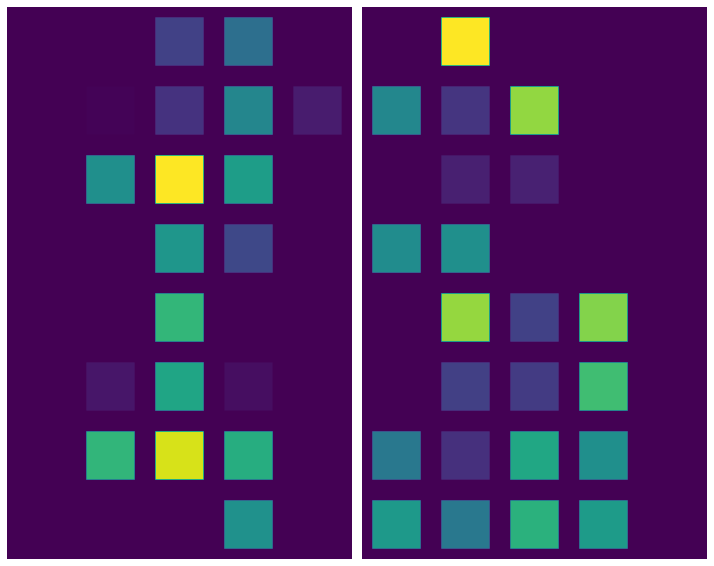

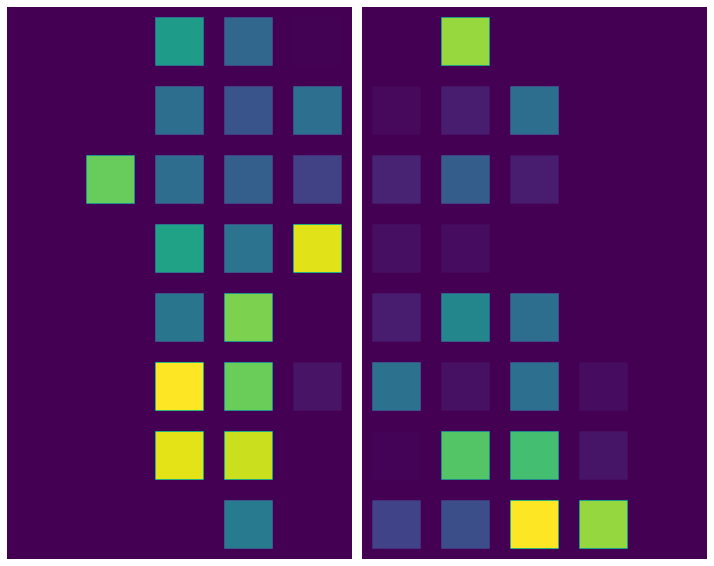

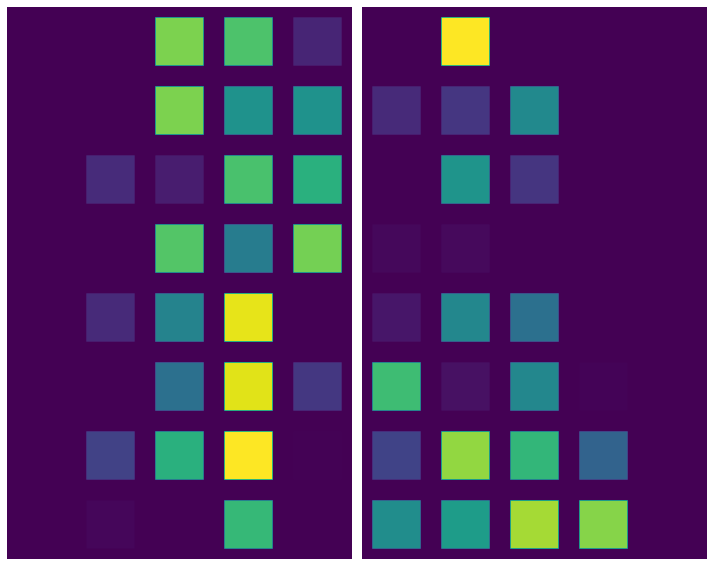

In [13]:
folders = ['rod20', 'rod30', 'rod50']
for folder in folders:

    fnames = glob.glob(f'{folder}/*.tact')
    fnames.sort()
    trial_list = init_list()
    for fname in fnames:
        
        df_timespan = read_neutouch_raw(fname)
        for index, value in df_timespan.taxel.value_counts().iteritems():
            if index == 0:
                continue
            trial_list[index] += value
            
    plot(f'{save_dir}/{folder}', trial_list)

In [ ]:
save_dir = 'analysis_rod'
total_list = init_list()
for trial in range(1, 14):
    
    fname = f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}.tact'
    if os.path.isfile(fname):
        df_raw = read_neutouch_raw(fname)
        df_essentials = pd.read_csv(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}_essentials.csv')
        tapped_times = df_essentials.t.values
        trial_list = init_list()
        for tap_time in tapped_times:
            df_timespan = df_raw[(df_raw.t >= (tap_time - time_past)) & (df_raw.t < (tap_time + time_future))]
            for index, value in df_timespan.taxel.value_counts().iteritems():
                if index == 0:
                    continue
                trial_list[index] += value
        plot(f'{save_dir}/rod_{tool_length}_{trial}', trial_list)
        total_list = add_list(total_list, trial_list)